In [79]:
pwd

'/Users/kelly/ds/metis/metisgh/prework'

In [80]:
import pandas as pd

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime as dt

In [82]:
#Targeting data in April 2018 to determine resource deployment for gala in June 2019

def get_data(week_nums):
    url = ("http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt")
    df = []
    for week in week_nums:
        week_url = url.format(week)
        df.append(pd.read_csv(week_url))
    return pd.concat(df)

week_nums = [180407, 180414, 180421, 180428]
mta_df = get_data(week_nums)     

In [83]:
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055


In [84]:
mta_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197574,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,05:00:00,REGULAR,2877053,386148
197575,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,09:00:00,REGULAR,2877060,386149
197576,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,13:00:00,REGULAR,2877136,386151
197577,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,17:00:00,REGULAR,2877237,386156
197578,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,21:00:00,REGULAR,2877307,386159


In [85]:
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [86]:
mta_df.DATE.value_counts().sort_index()

03/31/2018    28129
04/01/2018    28084
04/02/2018    28049
04/03/2018    28189
04/04/2018    28154
04/05/2018    28262
04/06/2018    28121
04/07/2018    28161
04/08/2018    28132
04/09/2018    28036
04/10/2018    28085
04/11/2018    28087
04/12/2018    27981
04/13/2018    28109
04/14/2018    28183
04/15/2018    28155
04/16/2018    28087
04/17/2018    28091
04/18/2018    28098
04/19/2018    28330
04/20/2018    28244
04/21/2018    28185
04/22/2018    28280
04/23/2018    28374
04/24/2018    28264
04/25/2018    28325
04/26/2018    28105
04/27/2018    28046
Name: DATE, dtype: int64

In [87]:
#Create new date time field

mta_df['DATE_TIME'] = pd.to_datetime(mta_df['DATE']+ ' ' + mta_df['TIME'], format = "%m/%d/%Y %H:%M:%S") - pd.Timedelta(minutes=1)
mta_df['DATE_2'] = mta_df['DATE_TIME'].dt.date
#mta_df['DATE_2'] = mta_df['DATE_TIME'].apply(lambda x: x.date())

In [88]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788346 entries, 0 to 197578
Data columns (total 13 columns):
C/A                                                                     788346 non-null object
UNIT                                                                    788346 non-null object
SCP                                                                     788346 non-null object
STATION                                                                 788346 non-null object
LINENAME                                                                788346 non-null object
DIVISION                                                                788346 non-null object
DATE                                                                    788346 non-null object
TIME                                                                    788346 non-null object
DESC                                                                    788346 non-null object
ENTRIES                           

In [89]:
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-30 23:59:00,2018-03-30
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 03:59:00,2018-03-31
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 07:59:00,2018-03-31
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 11:59:00,2018-03-31
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 15:59:00,2018-03-31


In [90]:
#mta_df['DATE_FORMATTED'] = pd.to_datetime(mta_df('DATE_TIME'))

In [91]:
#mta_df.DATE_TIME.iloc[:].date

In [92]:
#Check for unique entries

(mta_df
 .groupby(by = ['C/A','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES")).tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
262785,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-08 23:59:00,1
262786,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-09 03:59:00,1
262765,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-05 15:59:00,1
788344,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2018-04-27 20:59:00,1
267110,N183,R415,00-00-00,BROAD CHANNEL,2018-04-04 04:59:00,2


In [93]:
#On April 4th we have two entries for Broad Channel 

duplicate_mask = ((mta_df['C/A'] == 'N183') & 
                  (mta_df['UNIT'] == 'R415') & 
                  (mta_df['SCP'] == '00-00-00') & 
                  (mta_df['STATION'] == 'BROAD CHANNEL') &
                  (mta_df['DATE_TIME'].dt.date == datetime.datetime(2018,4,4).date()))

In [94]:
mta_df[duplicate_mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_2
67019,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,01:00:00,REGULAR,36983,25347,2018-04-04 00:59:00,2018-04-04
67020,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,05:00:00,REGULAR,36995,25351,2018-04-04 04:59:00,2018-04-04
67021,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,05:00:00,RECOVR AUD,36994,25351,2018-04-04 04:59:00,2018-04-04
67022,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,09:00:00,REGULAR,37045,25359,2018-04-04 08:59:00,2018-04-04
67023,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,13:00:00,REGULAR,37050,25366,2018-04-04 12:59:00,2018-04-04


In [95]:
# The April 4th data has an entry with the line description 'Recover Aud'
# The entry count for this date is one less than the 'Regular' count and exit count is the same
# We deem this difference immaterial thus conclude it can be ignored for the remainder of the analysis

In [96]:
#Check value count of descriptions before remove duplicate values

mta_df.DESC.value_counts()

REGULAR       786070
RECOVR AUD      2276
Name: DESC, dtype: int64

In [97]:
mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
mta_df.drop_duplicates(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [98]:
#Check that the Broad Channel entry is removed

(mta_df
 .groupby(by = ['C/A','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES")).tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
262784,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-08 19:59:00,1
262785,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-08 23:59:00,1
262786,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-09 03:59:00,1
262908,N141,R356,00-00-03,OZONE PK LEFFRT,2018-04-01 15:59:00,1
788344,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2018-04-27 20:59:00,1


In [99]:
#Check value count of descriptions after remove duplicate values

mta_df.DESC.value_counts()

REGULAR       786070
RECOVR AUD      2275
Name: DESC, dtype: int64

In [100]:
#Resort data in chronological order

mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=True)

In [101]:
#mta_df.DATE_TIME = mta_df.loc[:, 'DATE_TIME'] - pd.Timedelta(minutes=1)
#mta_df.DATE_2 = (mta_df.loc[:, 'DATE_2'] - pd.Timedelta(minutes=1)).iloc.datetime.date


In [102]:
mta_df.groupby(by = ['C/A', 'UNIT', 'SCP', 'STATION','DATE_TIME']).first().head(10)

LINENAME DIVISION        DATE  \
C/A  UNIT SCP      STATION DATE_TIME                                           
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 03:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 07:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 11:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 15:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 19:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 23:59:00  NQR456W      BMT  04/01/2018   
                           2018-04-01 03:59:00  NQR456W      BMT  04/01/2018   
                           2018-04-01 07:59:00  NQR456W      BMT  04/01/2018   
                           2018-04-01 11:59:00  NQR456W      BMT  04/01/2018   

                                                    TIME     DESC  ENTRIES  \
C/A  UNIT SCP      STATION DATE_TIME                                         
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00  00:00:00  REGULAR  6566463   
                           2018-03-31 03:59:00  04:00:00  REGULAR  6566470   
                           2018-03-31 07:59:00  08:00:00  REGULAR  6566470   
                           2018-03-31 11:59:00  12:00:00  REGULAR  6566470   
                           2018-03-31 15:59:00  16:00:00  REGULAR  6566470   
                           2018-03-31 19:59:00  20:00:00  REGULAR  6566470   
                           2018-03-31 23:59:00  00:00:00  REGULAR  6566470   
                           2018-04-01 03:59:00  04:00:00  REGULAR  6566470   
                           2018-04-01 07:59:00  08:00:00  REGULAR  6566470   
                           2018-04-01 11:59:00  12:00:00  REGULAR  6566470   

                                                EXITS                                                                 \
C/A  UNIT SCP      STATION DATE_TIME                                                                                   
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00                                            2224050                      
                           2018-03-31 03:59:00                                            2224053                      
                           2018-03-31 07:59:00                                            2224053                      
                           2018-03-31 11:59:00                                            2224055                      
                           2018-03-31 15:59:00                                            2224055                      
                           2018-03-31 19:59:00                                            2224055                      
                           2018-03-31 23:59:00                                            2224055                      
                           2018-04-01 03:59:00                                            2224055                      
                           2018-04-01 07:59:00                                            2224055                      
                           2018-04-01 11:59:00                                            2224055                      

                                                    DATE_2  
C/A  UNIT SCP      STATION DATE_TIME                        
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00  2018-03-30  
                           2018-03-31 03:59:00  2018-03-31  
                           2018-03-31 07:59:00  2018-03-31  
                           2018-03-31 11:59:00  2018-03-31  
                           2018-03-31 15:59:00  2018-03-31  
                           2018-03-31 19:59:00  2018-03-31  
                           2018-03-31 23:59:00  2018-03-31  
                           2018-04-01 03:59:00  2018-04-01  
                           2018-04-01 07:59:00  2018-04-01  
                           2018-04-01

In [103]:
mta_df.groupby(by = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME']).last().head(10)

LINENAME DIVISION        DATE  \
C/A  UNIT SCP      STATION DATE_TIME                                           
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 03:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 07:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 11:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 15:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 19:59:00  NQR456W      BMT  03/31/2018   
                           2018-03-31 23:59:00  NQR456W      BMT  04/01/2018   
                           2018-04-01 03:59:00  NQR456W      BMT  04/01/2018   
                           2018-04-01 07:59:00  NQR456W      BMT  04/01/2018   
                           2018-04-01 11:59:00  NQR456W      BMT  04/01/2018   

                                                    TIME     DESC  ENTRIES  \
C/A  UNIT SCP      STATION DATE_TIME                                         
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00  00:00:00  REGULAR  6566463   
                           2018-03-31 03:59:00  04:00:00  REGULAR  6566470   
                           2018-03-31 07:59:00  08:00:00  REGULAR  6566470   
                           2018-03-31 11:59:00  12:00:00  REGULAR  6566470   
                           2018-03-31 15:59:00  16:00:00  REGULAR  6566470   
                           2018-03-31 19:59:00  20:00:00  REGULAR  6566470   
                           2018-03-31 23:59:00  00:00:00  REGULAR  6566470   
                           2018-04-01 03:59:00  04:00:00  REGULAR  6566470   
                           2018-04-01 07:59:00  08:00:00  REGULAR  6566470   
                           2018-04-01 11:59:00  12:00:00  REGULAR  6566470   

                                                EXITS                                                                 \
C/A  UNIT SCP      STATION DATE_TIME                                                                                   
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00                                            2224050                      
                           2018-03-31 03:59:00                                            2224053                      
                           2018-03-31 07:59:00                                            2224053                      
                           2018-03-31 11:59:00                                            2224055                      
                           2018-03-31 15:59:00                                            2224055                      
                           2018-03-31 19:59:00                                            2224055                      
                           2018-03-31 23:59:00                                            2224055                      
                           2018-04-01 03:59:00                                            2224055                      
                           2018-04-01 07:59:00                                            2224055                      
                           2018-04-01 11:59:00                                            2224055                      

                                                    DATE_2  
C/A  UNIT SCP      STATION DATE_TIME                        
A002 R051 02-00-00 59 ST   2018-03-30 23:59:00  2018-03-30  
                           2018-03-31 03:59:00  2018-03-31  
                           2018-03-31 07:59:00  2018-03-31  
                           2018-03-31 11:59:00  2018-03-31  
                           2018-03-31 15:59:00  2018-03-31  
                           2018-03-31 19:59:00  2018-03-31  
                           2018-03-31 23:59:00  2018-03-31  
                           2018-04-01 03:59:00  2018-04-01  
                           2018-04-01 07:59:00  2018-04-01  
                           2018-04-01

In [104]:
#Calculate all entries by station by day from midnight through 8pm
#Note that the hours of 8pm to 12pm are excluded

#mta_df['num_ppl'] = mta_df.groupby(by = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'])['ENTRIES'].diff()

In [105]:
mta_df2 = mta_df#.drop(["C/A", "UNIT", "SCP", "LINENAME", "DIVISION", "DESC", "EXITS", "DATE_TIME"], axis=1, errors="ignore")

In [106]:
mta_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE_TIME', 'DATE_2'],
      dtype='object')

In [107]:
#Remove whitespace after Exits so we can delete that column

mta_df2.columns = [column.strip() for column in mta_df2.columns]
mta_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'DATE_2'],
      dtype='object')

In [108]:
mta_df2 = mta_df2.drop(["EXITS"], axis=1, errors="ignore") #did not drop DATE_TIME

In [109]:
mta_df2.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2018-03-30 23:59:00,2018-03-30
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2018-03-31 03:59:00,2018-03-31
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2018-03-31 07:59:00,2018-03-31
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2018-03-31 11:59:00,2018-03-31
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2018-03-31 15:59:00,2018-03-31
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2018-03-31 19:59:00,2018-03-31
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2018-03-31 23:59:00,2018-03-31
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2018-04-01 03:59:00,2018-04-01
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2018-04-01 07:59:00,2018-04-01
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2018-04-01 11:59:00,2018-04-01


In [110]:
#mta_df2['incremental_ppl'] = mta_df2['ENTRIES'].diff()

In [111]:
#mta_df2.head(20)

In [112]:
#mta_df2.groupby(by = ['STATION', 'DATE','C/A', 'UNIT', 'SCP'])['incremental_ppl'].sum().head()

In [113]:
#scp_mask = mta_df2['SCP'] =='00-03-01'

In [114]:
#mta_df2[scp_mask]

In [115]:
#station_mask = mta_df2['STATION'] == '59 ST'
#date_mask = mta_df2['DATE'] == '3/31/2018'

In [116]:
#filtered_by_station = mta_df2[station_mask]

In [117]:
#filtered_by_station.DATE.value_counts()

In [118]:
#mta_df2.groupby(by = ['STATION', 'DATE'])[['num_ppl']].sum()

In [119]:
#station_by_day = mta_df2.groupby(by = ['STATION', 'DATE'])[['num_ppl']].sum()
#plt.hist(station_by_day, range = (-10000,10000))

In [120]:
mta_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2018-03-30 23:59:00,2018-03-30
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2018-03-31 03:59:00,2018-03-31
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2018-03-31 07:59:00,2018-03-31
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2018-03-31 11:59:00,2018-03-31
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2018-03-31 15:59:00,2018-03-31


In [121]:
#DATE_TIME time_series.loc[:, DATE_TIME] - pd.Timedelta(minutes=1)

In [122]:
mta_df2.groupby(by = ['STATION', 'DATE_2'])['ENTRIES'].head()

0         6566463
1         6566470
2         6566470
3         6566470
4         6566470
5         6566470
7         6566470
8         6566470
9         6566470
10        6566470
11        6566470
13        6566470
14        6566495
15        6566629
16        6566839
17        6567469
19        6567630
20        6567660
21        6567822
22        6568094
23        6568775
25        6568924
26        6568955
27        6569103
28        6569377
29        6570115
31        6570307
32        6570338
33        6570480
34        6570768
           ...   
197417    4050380
197418    4050390
197419    4050434
197420    4050914
197421    4051900
197423    4052725
197424    4052730
197425    4053239
197426    4053681
197427    4054044
197429    4054380
197430    4054383
197431    4054787
197432    4055230
197433    4055599
197435    4055869
197436    4055870
197437    4056234
197438    4056774
197439    4056955
197441    4057139
197442    4057140
197443    4057501
197444    4057974
197445    

In [123]:
mta_df2['incremental_ppl'] = mta_df2.groupby(by = ['C/A', 'UNIT', 'SCP', 'STATION','DATE_2'])['ENTRIES'].diff()
mta_df2.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2018-03-30 23:59:00,2018-03-30,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2018-03-31 03:59:00,2018-03-31,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2018-03-31 07:59:00,2018-03-31,0.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2018-03-31 11:59:00,2018-03-31,0.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2018-03-31 15:59:00,2018-03-31,0.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2018-03-31 19:59:00,2018-03-31,0.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2018-03-31 23:59:00,2018-03-31,0.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2018-04-01 03:59:00,2018-04-01,NaN
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2018-04-01 07:59:00,2018-04-01,0.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2018-04-01 11:59:00,2018-04-01,0.0


In [124]:
mta_df2.groupby(by = ['STATION','C/A','UNIT','SCP','DATE'])[['incremental_ppl']].sum()

incremental_ppl
STATION   C/A  UNIT SCP      DATE                       
1 AV      H007 R248 00-00-00 03/31/2018           1825.0
                             04/01/2018           1784.0
                             04/02/2018           3213.0
                             04/03/2018           3474.0
                             04/04/2018           3630.0
                             04/05/2018           3880.0
                             04/06/2018           3837.0
                             04/07/2018           2334.0
                             04/08/2018           2170.0
                             04/09/2018           3755.0
                             04/10/2018           4019.0
                             04/11/2018           4034.0
                             04/12/2018           3960.0
                             04/13/2018           3856.0
                             04/14/2018           2864.0
                             04/15/2018           2303.0
                             04/16/2018           3701.0
                             04/17/2018           4142.0
                             04/18/2018           4093.0
                             04/19/2018           4367.0
                             04/20/2018           4259.0
                             04/21/2018           2787.0
                             04/22/2018           2233.0
                             04/23/2018           3497.0
                             04/24/2018           3694.0
                             04/25/2018           4015.0
                             04/26/2018           3833.0
                             04/27/2018           4109.0
                    00-00-01 03/31/2018           2692.0
                             04/01/2018           2650.0
...                                                  ...
ZEREGA AV R419 R326 00-05-00 04/26/2018              0.0
                             04/27/2018              0.0
                    00-05-01 03/31/2018              0.0
                             04/01/2018              0.0
                             04/02/2018              0.0
                             04/03/2018              0.0
                             04/04/2018              0.0
                             04/05/2018              0.0
                             04/06/2018              0.0
                             04/07/2018              0.0
                             04/08/2018              0.0
                             04/09/2018              0.0
                             04/10/2018              0.0
                             04/11/2018              0.0
                             04/12/2018              0.0
                             04/13/2018              0.0
                             04/14/2018              0.0
                             04/15/2018              0.0
                             04/16/2018              0.0
                             04/17/2018              0.0
                             04/18/2018              0.0
                             04/19/2018              0.0
                             04/20/2018              0.0
                             04/21/2018              0.0
                             04/22/2018              0.0
                             04/23/2018              0.0
                             04/24/2018              0.0
                             04/25/2018              0.0
                             04/26/2018              0.0
                             04/27/2018              0.0

[131500 rows x 1 columns]

In [125]:
negative_mask = mta_df2['incremental_ppl'] < 0

In [126]:
mta_df2[negative_mask].head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,08:00:00,REGULAR,886027811,2018-03-31 07:59:00,2018-03-31,-84.0
1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,12:00:00,REGULAR,886027423,2018-03-31 11:59:00,2018-03-31,-388.0
1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,16:00:00,REGULAR,886026932,2018-03-31 15:59:00,2018-03-31,-491.0
1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,20:00:00,REGULAR,886026296,2018-03-31 19:59:00,2018-03-31,-636.0
1434,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,00:00:00,REGULAR,886025878,2018-03-31 23:59:00,2018-03-31,-418.0
1436,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,08:00:00,REGULAR,886025682,2018-04-01 07:59:00,2018-04-01,-70.0
1437,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,12:00:00,REGULAR,886025424,2018-04-01 11:59:00,2018-04-01,-258.0
1438,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,16:00:00,REGULAR,886025040,2018-04-01 15:59:00,2018-04-01,-384.0
1439,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,20:00:00,REGULAR,886024555,2018-04-01 19:59:00,2018-04-01,-485.0
1440,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/02/2018,00:00:00,REGULAR,886024281,2018-04-01 23:59:00,2018-04-01,-274.0


In [127]:
mta_df2[negative_mask]['STATION'].unique()

array(['57 ST-7 AV', '34 ST-HERALD SQ', 'CORTLANDT ST', 'CANAL ST',
       '59 ST', 'FT HAMILTON PKY', 'BAY PKWY', '6 AV', 'DEKALB AV',
       '104 ST', 'HOWARD BCH JFK', 'JFK JAMAICA CT1', 'METROPOLITAN AV',
       '42 ST-PORT AUTH', '14 ST', '161/YANKEE STAD', 'BEDFORD PK BLVD',
       'LEXINGTON AV/53', 'NORTHERN BLVD', 'GRAND-NEWTOWN',
       'FOREST HILLS 71', 'JAMAICA 179 ST', 'GREENPOINT AV', '23 ST',
       '7 AV', 'DITMAS AV', '57 ST', 'LEXINGTON AV/63', 'JAMAICA CENTER',
       '72 ST-2 AVE', 'NEWARK HW BMEBE', 'HARRISON', 'JOURNAL SQUARE',
       'EXCHANGE PLACE', 'CITY / BUS', '9TH STREET', '14TH STREET',
       'THIRTY ST', 'LACKAWANNA', 'THIRTY THIRD ST', 'NEWARK BM BW',
       'NEWARK C', 'NEWARK HM HE', 'PATH WTC 2', 'PATH NEW WTC',
       'SOUTH FERRY', 'TIMES SQ-42 ST', '72 ST', 'BROOKLYN BRIDGE',
       'BLEECKER ST', 'GRD CNTRL-42 ST', '125 ST', 'BURNSIDE AV',
       '135 ST', '3 AV-149 ST', '174 ST', 'QUEENSBORO PLZ',
       '46 ST BLISS ST', 'FRANKLIN AV', 'FLATBU

In [128]:
mta_df2[negative_mask]['STATION'].nunique()

61

In [129]:
mta_df2[negative_mask]['C/A'].nunique()

68

In [130]:
mta_df2[negative_mask]['UNIT'].unique()

array(['R080', 'R023', 'R088', 'R118', 'R212', 'R391', 'R394', 'R163',
       'R236', 'R007', 'R535', 'R536', 'R100', 'R011', 'R175', 'R354',
       'R195', 'R156', 'R017', 'R298', 'R254', 'R141', 'R019', 'R239',
       'R022', 'R453', 'R288', 'R420', 'R302', 'R319', 'R025', 'R570',
       'R549', 'R544', 'R552', 'R543', 'R550', 'R547', 'R545', 'R541',
       'R540', 'R001', 'R105', 'R033', 'R452', 'R044', 'R194', 'R131',
       'R048', 'R051', 'R132', 'R244', 'R206', 'R207', 'R053', 'R386',
       'R121', 'R223', 'R123', 'R110', 'R431'], dtype=object)

In [131]:
mta_df2[negative_mask]['UNIT'].nunique()

61

In [132]:
mta_df2[negative_mask]['SCP'].unique()

array(['01-00-00', '01-03-01', '01-03-02', '02-05-00', '00-00-00',
       '00-00-02', '01-06-00', '01-06-01', '01-00-02', '00-06-00',
       '00-00-01', '00-00-04', '00-00-05', '00-00-08', '01-03-00',
       '00-06-01', '01-05-01', '01-03-04', '01-06-02', '02-01-03',
       '00-05-04', '00-03-01', '01-00-06', '00-04-05', '00-02-00',
       '00-02-01', '00-01-00', '00-01-03', '00-01-04', '00-01-05',
       '00-00-03', '00-04-07', '01-01-00', '01-01-02', '01-02-03',
       '01-00-07', '01-00-04', '01-02-00', '03-00-04', '00-00-07',
       '00-01-01', '00-03-05', '02-00-01', '01-00-01', '00-03-04',
       '00-05-00', '00-05-01', '00-06-02'], dtype=object)

In [133]:
mta_df2[negative_mask]['SCP'].nunique()

48

In [134]:
#Remove these rows for now
#Return to see if salvageable if time permits

mta_df2[negative_mask].shape

(5545, 13)

In [135]:
mta_df2.shape

(788345, 13)

In [136]:
positive_mask = mta_df2['incremental_ppl'] > 0

In [137]:
mta_df2[positive_mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,6566495,2018-04-02 07:59:00,2018-04-02,25.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,6566629,2018-04-02 11:59:00,2018-04-02,134.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,6566839,2018-04-02 15:59:00,2018-04-02,210.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,6567469,2018-04-02 19:59:00,2018-04-02,630.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2018,00:00:00,REGULAR,6567630,2018-04-02 23:59:00,2018-04-02,161.0


In [138]:
#Reassign DataFrame to included only positive incremental counts

mta_df2 = mta_df2[positive_mask]

In [139]:
#Check minimum incremental person is not less than 0

mta_df2.incremental_ppl.min()

1.0

In [140]:
mta_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,6566495,2018-04-02 07:59:00,2018-04-02,25.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,6566629,2018-04-02 11:59:00,2018-04-02,134.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,6566839,2018-04-02 15:59:00,2018-04-02,210.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,6567469,2018-04-02 19:59:00,2018-04-02,630.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2018,00:00:00,REGULAR,6567630,2018-04-02 23:59:00,2018-04-02,161.0


In [141]:
#Count incremental people greater than threshold indicated for each C/A, Unit, SCP, Station combination
#during four hour windows 

outliers = mta_df2['incremental_ppl'] > 10000

In [142]:
mta_df2.shape

(558848, 13)

In [143]:
mta_df2[outliers]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
28633,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,03/31/2018,17:00:00,REGULAR,1900568,2018-03-31 16:59:00,2018-03-31,1.881723e+06
78677,N319,R298,01-06-01,NORTHERN BLVD,MR,IND,04/20/2018,16:56:24,REGULAR,458753,2018-04-20 16:55:24,2018-04-20,4.376270e+05
100938,N539,R288,00-00-03,7 AV,FG,IND,04/17/2018,13:00:00,REGULAR,1322948,2018-04-17 12:59:00,2018-04-17,5.931790e+05
102658,N547,R420,01-06-01,DITMAS AV,F,IND,04/15/2018,17:00:00,REGULAR,655401,2018-04-15 16:59:00,2018-04-15,6.553700e+05
112984,PTH05,R543,00-01-00,EXCHANGE PLACE,1,PTH,04/09/2018,11:58:07,REGULAR,173037,2018-04-09 11:57:07,2018-04-09,1.285940e+05
117331,PTH16,R550,01-01-00,LACKAWANNA,1,PTH,04/05/2018,11:45:58,REGULAR,37642,2018-04-05 11:44:58,2018-04-05,3.666200e+04
155993,R245A,R051,01-06-01,59 ST,456NQRW,IRT,04/19/2018,20:00:00,REGULAR,458773,2018-04-19 19:59:00,2018-04-19,4.574890e+05
162546,R287,R244,00-05-00,BURNSIDE AV,4,IRT,04/26/2018,20:00:00,REGULAR,117460591,2018-04-26 19:59:00,2018-04-26,1.169849e+08
162869,R289,R119,00-03-00,FORDHAM RD,4,IRT,04/24/2018,16:00:00,REGULAR,1107348713,2018-04-24 15:59:00,2018-04-24,1.102986e+09
174570,R501,R054,00-00-03,5 AVE,7BDFM,IRT,04/06/2018,12:00:00,REGULAR,838900529,2018-04-06 11:59:00,2018-04-06,8.387352e+08


In [144]:
3.666200e+04

36662.0

In [145]:
incorrect_outliers = mta_df2[outliers]

In [146]:
incorrect_outliers['incremental_ppl'].count()

10

In [147]:
incorrect_outliers['incremental_ppl'].sort_values(ascending = False)

162869    1.102986e+09
174570    8.387352e+08
162546    1.169849e+08
28633     1.881723e+06
102658    6.553700e+05
100938    5.931790e+05
155993    4.574890e+05
78677     4.376270e+05
112984    1.285940e+05
117331    3.666200e+04
Name: incremental_ppl, dtype: float64

In [148]:
mta_df2['incremental_ppl'].sort_values(ascending = False).head(20)

162869    1.102986e+09
174570    8.387352e+08
162546    1.169849e+08
28633     1.881723e+06
102658    6.553700e+05
100938    5.931790e+05
155993    4.574890e+05
78677     4.376270e+05
112984    1.285940e+05
117331    3.666200e+04
115727    4.875000e+03
46906     3.270000e+03
46912     3.174000e+03
46828     3.153000e+03
176323    3.098000e+03
46822     3.082000e+03
176840    3.058000e+03
152975    2.987000e+03
154107    2.978000e+03
154119    2.955000e+03
Name: incremental_ppl, dtype: float64

In [149]:
mta_df2['incremental_ppl'].max()

1102986395.0

In [150]:
mta_df2.shape

(558848, 13)

In [151]:
mta_df2[mta_df2['incremental_ppl'] > 10000].shape

(10, 13)

In [152]:
outlier_filter = mta_df2['incremental_ppl'] < 10000

In [153]:
#Filter out outliers
#Go back and fix for incorrect entries by resetting counter if time permits

outlier_filter = mta_df2['incremental_ppl'] < 10000
mta_df2 = mta_df2[outlier_filter]

In [154]:
mta_df.shape

(788345, 13)

In [155]:
mta_df2['incremental_ppl'].max()

4875.0

In [156]:
mta_df2['incremental_ppl'].min()

1.0

In [157]:
#Total by Station by Date

mta_df2.groupby(by = ['STATION', 'DATE_2'], as_index = False)[['incremental_ppl']].sum().head()

,STATION,DATE_2,incremental_ppl
0,1 AV,2018-03-31,15187.0
1,1 AV,2018-04-01,10883.0
2,1 AV,2018-04-02,18060.0
3,1 AV,2018-04-03,19425.0
4,1 AV,2018-04-04,20189.0


In [189]:
total_by_date = mta_df2.groupby(by = ['STATION', 'DATE_2'], as_index = False)[['incremental_ppl']].sum()

In [158]:
#Total by Station

mta_df2.groupby(by = ['STATION'], as_index = False)[['incremental_ppl']].sum().head()

,STATION,incremental_ppl
0,1 AV,547809.0
1,103 ST,750639.0
2,103 ST-CORONA,491711.0
3,104 ST,73199.0
4,110 ST,262924.0


In [159]:
total_by_station = mta_df2.groupby(by = ['STATION'], as_index = False)[['incremental_ppl']].sum()

In [174]:
total_by_station.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)

In [175]:
(total_by_station
#.groupby(by = ['STATION'], as_index = False)#[['incremental_ppl']].sum()
.sort_values(by = ['total_ppl'], ascending = (False))
#.groupby(by = ['STATION'], as_index = False)[['incremental_ppl']].sum()
 
#.head(20)
)

,STATION,total_ppl
59,34 ST-PENN STA,3948737.0
229,GRD CNTRL-42 ST,3375891.0
57,34 ST-HERALD SQ,2699590.0
45,23 ST,2653383.0
347,TIMES SQ-42 ST,2364082.0
14,14 ST-UNION SQ,2278722.0
222,FULTON ST,2215654.0
65,42 ST-PORT AUTH,2185570.0
107,86 ST,2056315.0
83,59 ST COLUMBUS,1804594.0


In [203]:
#Limit remaining search to top 30 stations by scanning through list 
#Inclusive of Barclays center / Brooklyn, Wall Street, PATH
#Can adjust based on zip code / tech hub data

top_30 = (total_by_station
.sort_values(by = ['total_ppl'], ascending = (False))
.head(30))

In [176]:
total_by_station.shape

(372, 2)

Text(0.5,1,'Entries per Station (April 2018)')

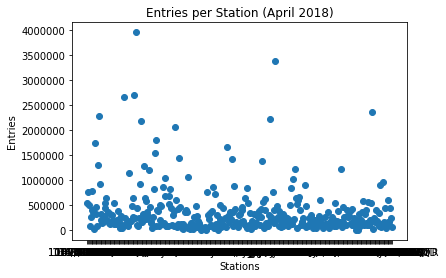

In [178]:
x = total_by_station['STATION']
y = total_by_station['total_ppl']

plt.scatter(x, y)
plt.xlabel("Stations")
plt.ylabel("Entries")
plt.title("Entries per Station (April 2018)")

In [179]:
#Mean is higher than the median, this data is skewed right
total_by_station.describe()

,total_ppl
count,3.720000e+02
mean,3.596813e+05
std,4.790247e+05
min,3.515000e+03
25%,1.084992e+05
50%,2.075925e+05
75%,4.024262e+05
max,3.948737e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1385e8828>]],
      dtype=object)

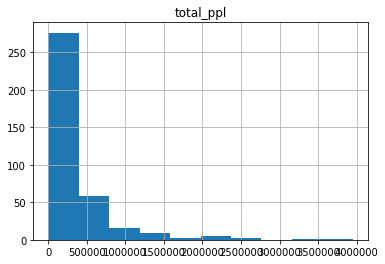

In [180]:
total_by_station.hist()

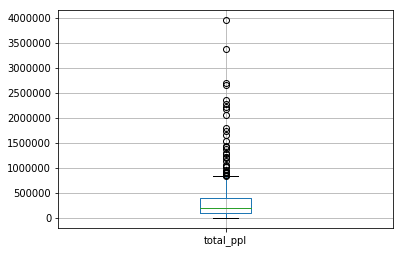

In [181]:
total_by_station.boxplot();

In [184]:
#Focus on first quartile

first_quartile = total_by_station['total_ppl'] > 4.024262e+05
total_by_station[first_quartile].count()

STATION      93
total_ppl    93
dtype: int64

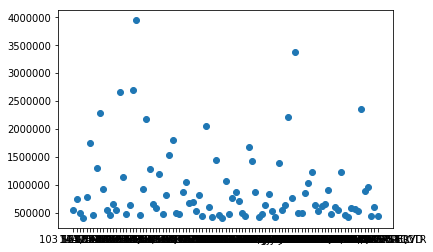

In [187]:
x = total_by_station[first_quartile]['STATION']
y = total_by_station[first_quartile]['total_ppl']
plt.scatter(x,y)

In [188]:
total_by_station.columns

Index(['STATION', 'total_ppl'], dtype='object')

In [190]:
total_by_date.columns

Index(['STATION', 'DATE_2', 'incremental_ppl'], dtype='object')

In [194]:
type(total_by_date['DATE_2'])

pandas.core.series.Series

In [198]:
total_by_date['weekday'] = pd.to_datetime(total_by_date['DATE_2']).dt.dayofweek

In [199]:
total_by_date.head()

,STATION,DATE_2,incremental_ppl,weekday
0,1 AV,2018-03-31,15187.0,5
1,1 AV,2018-04-01,10883.0,6
2,1 AV,2018-04-02,18060.0,0
3,1 AV,2018-04-03,19425.0,1
4,1 AV,2018-04-04,20189.0,2


In [209]:
total_by_date.groupby(by = ['weekday']).sum()

,incremental_ppl
weekday,
0,21208065.0
1,22783331.0
2,22866972.0
3,23251105.0
4,22081559.0
5,12433892.0
6,9176507.0


In [211]:
weekday_total = total_by_date.groupby(by = ['weekday']).sum()

In [213]:
weekday_total.reset_index()

,weekday,incremental_ppl
0,0,21208065.0
1,1,22783331.0
2,2,22866972.0
3,3,23251105.0
4,4,22081559.0
5,5,12433892.0
6,6,9176507.0


In [214]:
weekday_total = weekday_total.reset_index()

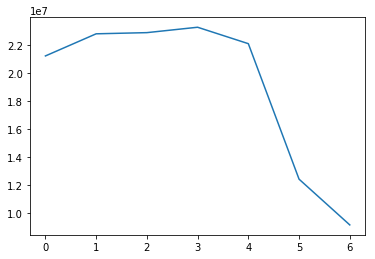

In [222]:
x = weekday_total.weekday
y = weekday_total.incremental_ppl


plt.plot(x,y);
#plt.xlabel('M', 'T', 'W', 'Th', 'F', 'Sa', 'Sn')

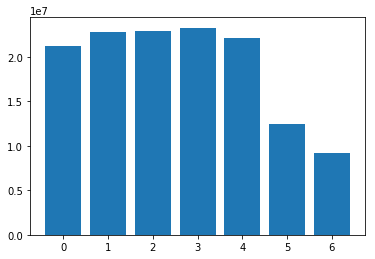

In [223]:
x = weekday_total.weekday
y = weekday_total.incremental_ppl


plt.bar(x,y);